# Visualization Sandbox
A notebook to explore each of the vizualizations that will be included in the final summary report. This document is used to informally explore various visualization libraries and develop code to be implemented into the data visualization pipeline.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
df = pd.read_csv("../../dummy_cover_sheet_data.csv")

# 1. Goal Status compared to last quarter

In [3]:
num_apgs = len(df.loc[df["Agency Name"] == "SBA", "Goal Name"].unique())

In [4]:
status_df = pd.read_csv("../../goal_status.csv")

Method of ordering status on x-axis of plot

In [5]:
from pandas.api.types import CategoricalDtype

status_ordered = CategoricalDtype(
    ['Blocked', 'On Track', 'Ahead'], 
    ordered=True
)

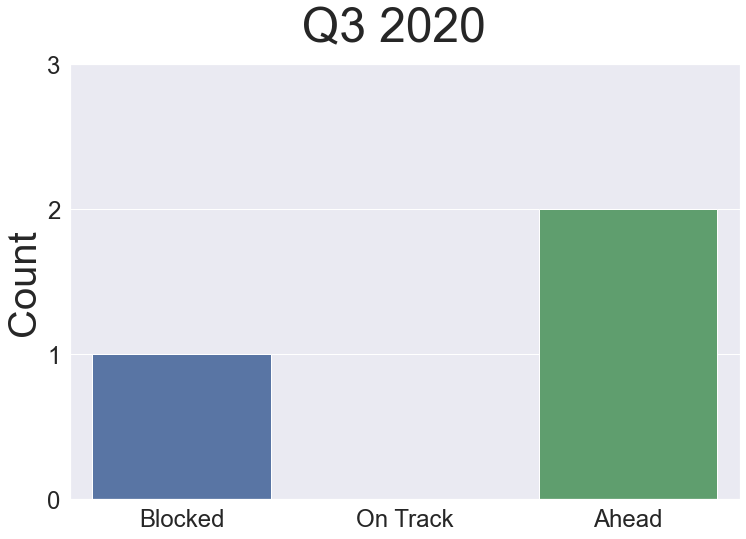

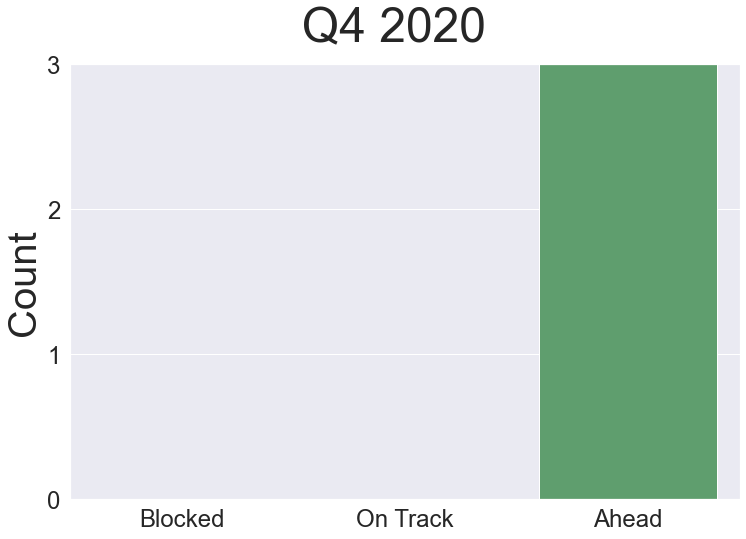

In [6]:
sns.set_theme()

font = {
    'family' : 'sans-serif',
    'size'   : 40
}
plt.rc('font', **font)

for quarter in ["Q3", "Q4"]:
    unique_statuses = status_df.loc[(status_df["Agency Name"] == "SBA") & (status_df["Fiscal Year"] == 2020) & (status_df["Quarter"] == quarter)].reset_index(drop=True)
    
    for status in ['Ahead', 'Blocked', 'On track']:
        if not status in unique_statuses["Status"].unique():
            new_row = pd.Series(unique_statuses.iloc[0])
            new_row["Status"] = status
            new_row["Count"] = 0
            unique_statuses = unique_statuses.append(new_row).reset_index(drop=True)    
            
    unique_statuses["Status"] = unique_statuses["Status"].astype(status_ordered)
    sns.barplot(x=unique_statuses["Status"], y=unique_statuses["Count"])
    plt.suptitle(f"{quarter} 2020")
    plt.xlabel("")
    plt.gca().margins(y=0)
    plt.yticks(ticks=[i for i in range(num_apgs + 1)])
    fig = plt.gcf()
    ax = plt.gca()
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    ax.set_ylabel(ax.yaxis.get_label().get_text(), fontdict=font)
    
    fig.set_size_inches(12, 8)
    fig.savefig(f"../viz/goal_status_{quarter.lower()}_2020", bbox_inches='tight')
    plt.show() # essentially clears plot

# 2. Network diagram
TBD. The idea here is to somehow link CAP goals and/or APGs across agencies.

# 3. Recurring challenges
The idea here is to have a simple visualization that represents challenges that have been recurring over several quarters (e.g., if hiring has been reported for 5 straight quarters). This is more logic-based than figure-based; will hold off on implementing it for now.

# 4. Bump Chart

In [7]:
challenge_df = pd.read_csv("../../challenge_count_by_quarter.csv").sort_values(by=["Fiscal Year", "Quarter"])

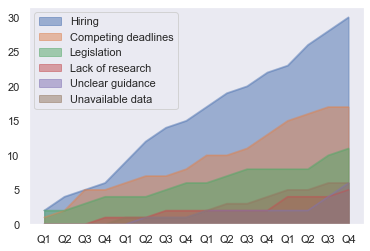

In [8]:
data = {}

for challenge in challenge_df.Challenge.unique():
    cumsum = list(challenge_df.loc[challenge_df["Challenge"] == challenge]["Count"].cumsum())
    data[challenge] = cumsum
    
pd.DataFrame(data).plot.area(stacked=False)
plt.xticks([i for i in range(len([f"{quarter}" for year in challenge_df["Fiscal Year"].unique() for quarter in challenge_df["Quarter"].unique()]))], [f"{quarter}" for year in challenge_df["Fiscal Year"].unique() for quarter in challenge_df["Quarter"].unique()])
plt.gca().grid(False)
plt.show()

# 5. Total occurrences of each challenge that was reported in quarter

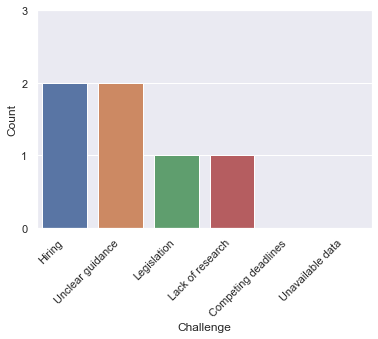

In [9]:
df_slice = challenge_df.loc[(challenge_df["Quarter"] == "Q4") & (challenge_df["Fiscal Year"] == 2020)].sort_values(by="Count", ascending=False)
sns.barplot(x="Challenge", y="Count", data=df_slice, ci=None)
plt.xticks(rotation=45, ha = 'right')
plt.yticks(ticks=[i for i in range(num_apgs + 1)])
plt.show()

# 6. Current goal status speedometer
This would be a static image that is placed into the Word doc based on the goal status: this will be designed outside of any visualization libraries.